# GPT NEO

## **Objetivo**: Crear una aplicación donde tener un feedback sobre comentarios.

In [1]:
#cargamos librerías
import streamlit as st
from PIL import Image #para colocar el logo de la aplicación
import torch
from transformers import pipeline
"""device = "cuda:0" if torch.cuda.is_available() else "cpu" #parámetro para utilizar el gpu para que vaya más rápido"""


'device = "cuda:0" if torch.cuda.is_available() else "cpu" #parámetro para utilizar el gpu para que vaya más rápido'

https://pytorch.org/get-started/previous-versions/

In [2]:
"""%pip install sentencepiece"""
"""# CUDA 11.8
%conda install pytorch==2.0.0 torchvision==0.15.0 torchaudio==2.0.0 pytorch-cuda=11.8 -c pytorch -c nvidia"""

'# CUDA 11.8\n%conda install pytorch==2.0.0 torchvision==0.15.0 torchaudio==2.0.0 pytorch-cuda=11.8 -c pytorch -c nvidia'

# Crear Singletons

### Memo or singleton?

https://docs.streamlit.io/library/api-reference/performance

* Dataframe computation- use **memo**
* storing downloaded data- **memo**
* calculating pi to n digits- **memo**
* tensorflorw session: this is a non-data object - ise **singleton**
* database connection- **singleton**

https://docs.streamlit.io/library/advanced-features/caching

As mentioned, there are two caching decorators:

* st.cache_data is the recommended way to cache computations that return data: loading a DataFrame from CSV, transforming a NumPy array, querying an API, or any other function that returns a serializable data object (str, int, float, DataFrame, array, list, …). It creates a new copy of the data at each function call, making it safe against mutations and race conditions. The behavior of st.cache_data is what you want in most cases – so if you're unsure, start with st.cache_data and see if it works!
  
* st.cache_resource is the recommended way to cache global resources like ML models or database connections – unserializable objects that you don't want to load multiple times. Using it, you can share these resources across all reruns and sessions of an app without copying or duplication. Note that any mutations to the cached return value directly mutate the object in the cache (more details below).

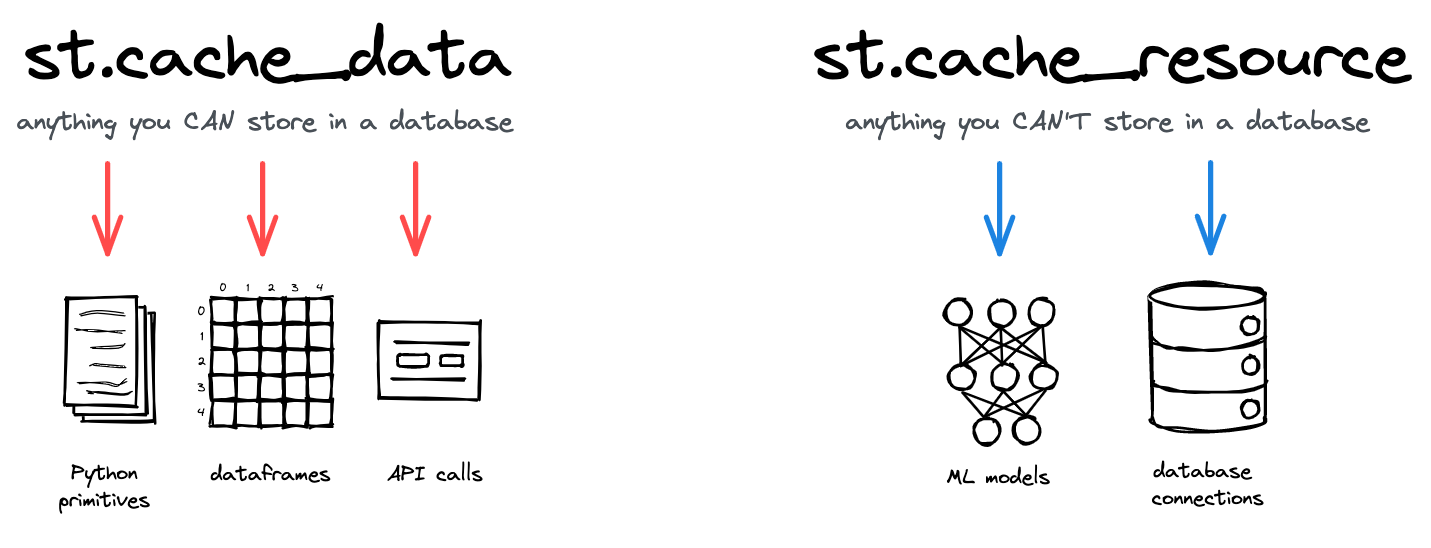

In [3]:
@st.cache_resource
#hacemos un generador que nos permite hacer una inferencia, device 0 para que utilice el gpu
def model_generator():
    generator = pipeline("text-generation", model = "EleutherAI/gpt-neo-125M", device = 0)
    return generator

@st.cache_resource
#utilizaremos un traductor de ingles a español
def model_translator_en_es():
    translator = pipeline("translation", model = "Helsinki-NLP/opus-mt-en-es")
    return translator

@st.cache_resource
#y un traductor de español al ingles
def model_translator_es_en():
    translator = pipeline("translation", model = "Helsinki-NLP/opus-mt-es-en")
    return translator

@st.cache_resource
#le pasamos el decorador singleton, para que no esté cargando a cada rato el modelo
def model_sentiment():
    classifier = pipeline("sentiment-analysis", model = "distilbert-base-uncased-finetuned-sst-2-english")
    return classifier

generator = model_generator()
translator_en_es = model_translator_en_es()
translator_es_en = model_translator_es_en()
sentiment = model_sentiment()

2024-07-01 15:59:18.823 
  command:

    streamlit run c:\Users\GAMM\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


c:\Users\GAMM\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\GAMM\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


AssertionError: Torch not compiled with CUDA enabled

# Layout - Sidebar

In [ ]:
logo_gpt = Image.open("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_0.jpg")
with st.sidebar:
    st.image(logo_gpt)
    
#titulo de nuestra aplicación
st.title("GPT Neo - Análisis de Sentimiento")

#Input de texto traducido al español
#text_area para que sean múltiples líneas, será el título de la variable, el texto pasa en español y lo traducimos
prompt_es = st.text_area("Texto a Generar", "Insertar Texto Aquí:")
prompt_en = translator_es_en(prompt_es)

# Generar texto con el prompt en inglés
#prompt_en nos va a generar una lista y el primer elemento [0] es el texto que tradujo en inglés
results = generator(prompt_en[0]["translation_text"], do_sample = True, max_length = 256, temperature = 0.95)
gen_text_en = results[0]["generated_text"]

# Traducir el texto de respuesta generado a español
gen_text_es = translator_en_es(gen_text_en)
st.write("texto generado: ", gen_text_es[0]["translation_text"])

# Aplicar Sentiment Analisis al texto generado
sentiment_en = sentiment(gen_text_es)
st.write(sentiment_en)


### Cuatro modelos usados para la aplicación